In [1]:
import torch
import numpy as np
import pandas as pd
import random
import json
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import shap


/workspace/tripx/miniconda3/envs/big_data_v2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x = torch.from_numpy(x)
        try:
            x = self.fc1(x)
        except: 
            x = torch.from_numpy(x).type(torch.FloatTensor)
            x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [40]:
data_path = '/workspace/tripx/MCS/xai_causality/dataset/scaled_cali_housing.csv'
data_train = pd.read_csv(data_path)

In [41]:
copy_data_train = data_train

In [42]:
data_train

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638
...,...,...,...,...,...,...,...,...,...,...
20635,20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701,0.130105
20636,20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749,0.128043
20637,20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753,0.159383
20638,20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793,0.143713


In [43]:
data_train.drop(['Unnamed: 0', 'price' ], axis=1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


In [6]:
data_train 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


In [7]:
# Check for GPU availability
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device='cpu'
data_path = '/workspace/tripx/MCS/xai_causality/dataset/scaled_cali_housing.csv'
data = pd.read_csv(data_path)
data = data.to_numpy()

In [8]:
X = data[:,1:-1].astype(np.float32)
y = data[:,-1].astype(np.float32)    
# Load your data, assuming you have X and y for features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Move your data to the GPU if available
# Convert data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)

In [9]:
lr=0.001

In [10]:
# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# Instantiate the model
model = RegressionModel(input_size=X.shape[1], hidden_size=10, output_size=1)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device='cpu'
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)


In [11]:
# Training loop
for epoch in range(2):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = nn.MSELoss()(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


In [12]:
# Evaluate on the test set
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_pred = model(X_test_tensor)

In [13]:
# Convert predictions and ground truth to numpy arrays
y_pred = y_pred.numpy()
y_test_np = y_test_tensor.numpy()

In [14]:
y_pred

array([[0.37026417],
       [0.36717206],
       [0.4088068 ],
       ...,
       [0.4511993 ],
       [0.40929008],
       [0.3586501 ]], dtype=float32)

In [15]:
y_test_np

array([0.06742446, 0.06350695, 1.        , ..., 1.        , 0.11814591,
       0.2814442 ], dtype=float32)

In [16]:
mse = np.mean((y_pred - y_test_np)**2)


In [17]:
mse

0.05695816

In [18]:
def nn_predict(X_test):
    model.eval()
    with torch.no_grad():
        X_test_tensor = X_test
        y_pred = model(X_test_tensor)
    return y_pred

In [19]:
nn_predict(X_train_tensor)

tensor([[0.3904],
        [0.4239],
        [0.2989],
        ...,
        [0.3857],
        [0.3838],
        [0.3991]])

In [31]:
X100 = shap.utils.sample(X_train, 500)

In [32]:
explainer = shap.Explainer(nn_predict, X100)


In [33]:
data_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


In [34]:
import matplotlib.pyplot as plt

In [35]:
shap_values = explainer(data_train)

ExactExplainer explainer: 20641it [01:14, 238.65it/s]                                                          


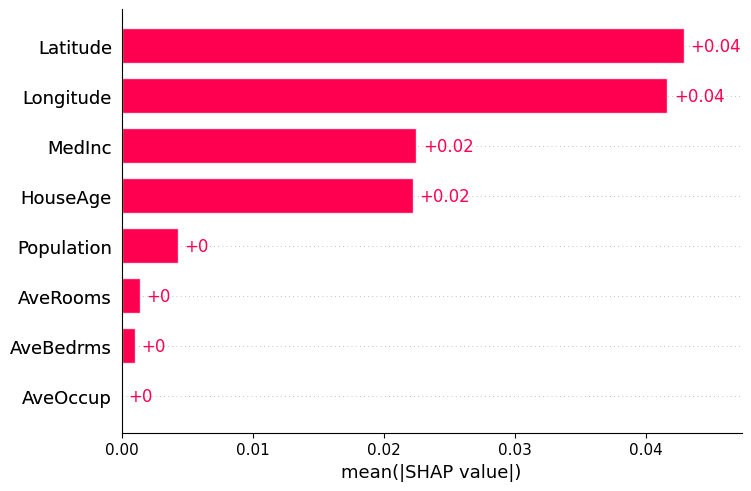

In [36]:
shap.plots.bar(shap_values, show=False)
plt.savefig('scratch.png')

<Figure size 640x480 with 0 Axes>

In [26]:
pwd

'/workspace/tripx/MCS/xai_causality/baseline_xai'